Amirhesam_Nakhaee_9823137

Q1

In [1]:
import numpy as np

class perceptron:
    def __init__(self, n):
        # Initialize the perceptron with random weights
        self.w = np.random.rand(n, n) * 0.5
        self.n = n

    def forward(self, x):
        # Forward pass through the perceptron using the Heaviside step function as activation
        y = np.heaviside(x @ self.w, 0)
        return y

    def train(self, label, x, c):
        # Training function to update weights based on labeled input data
        for i in range(self.n):
            # Get the ith training example and its label
            z = np.vstack(x[i])
            lz = label[i]

            # Forward pass to get predicted output
            y_pred = self.forward(z.T)

            # Compute the difference between predicted and true labels
            r = np.vstack((lz - y_pred))

            # Update weights based on the learning rate (c) and the input and error
            dw = c * (z @ r)
            self.w += dw

        # Return the final predicted output after training
        y_pred = self.forward(x)
        return y_pred


# Create two instances of the perceptron class for (L) and (H)
ins_L = perceptron(3)
ins_H = perceptron(3)

# Define input patterns for (L) and (H)
x_L = np.array(([0, 1, 1], [0, 1, 1], [0, 0, 0]))
x_H = np.array(([0, 1, 0], [0, 0, 0], [0, 1, 0]))

# Add noise to input patterns
noise = np.random.rand(3, 3) * 0.05
xn_L = x_L + noise
xn_H = x_H + noise

# Define labels for (L) and (H)
label_L = np.array(([0, 1, 1], [0, 1, 1], [0, 0, 0]))
label_H = np.array(([0, 1, 0], [0, 0, 0], [0, 1, 0]))

# Train and print results for (L) without noise
print(f'L without noise: \n{ins_L.train(label_L, x_L, 0.4)}\n')

# Train and print results for (L) with noise
print(f'L with noise: \n{ins_L.train(label_L, xn_L, 0.4)}\n')

# Train and print results for (H) without noise
print(f'H without noise: \n{ins_H.train(label_H, x_H, 0.4)}\n')

# Train and print results for (H) with noise
print(f'H with noise: \n{ins_H.train(label_H, xn_H, 0.4)}\n')


L without noise: 
[[0. 1. 1.]
 [0. 1. 1.]
 [0. 0. 0.]]

L with noise: 
[[0. 1. 1.]
 [0. 1. 1.]
 [0. 1. 1.]]

H without noise: 
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]

H with noise: 
[[0. 1. 0.]
 [0. 1. 1.]
 [0. 1. 0.]]



Q2

Epoch 1/50
50/50 [==============================] - 1s 9ms/step - loss: 1.4158 - accuracy: 0.5119 - val_loss: 1.2136 - val_accuracy: 0.6561
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 1.1243 - accuracy: 0.6330 - val_loss: 0.9629 - val_accuracy: 0.6994
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.9599 - accuracy: 0.6849 - val_loss: 0.8298 - val_accuracy: 0.7096
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.8398 - accuracy: 0.7158 - val_loss: 0.7554 - val_accuracy: 0.7236
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.7735 - accuracy: 0.7257 - val_loss: 0.7215 - val_accuracy: 0.7299
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.7364 - accuracy: 0.7391 - val_loss: 0.6998 - val_accuracy: 0.7299
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.7112 - accuracy: 0.7467 - val_loss: 0.6796 - val_accuracy: 0.7414
Epoch 8/50
50/50 [==

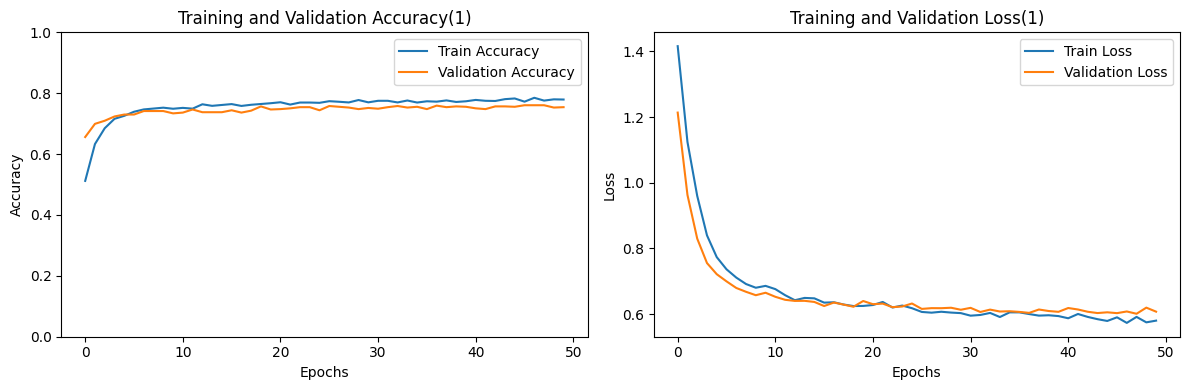

train accuracy1 = 77.923%

validation accuracy1 = 75.414%

train loss1 = 0.58

validation loss1 = 0.608



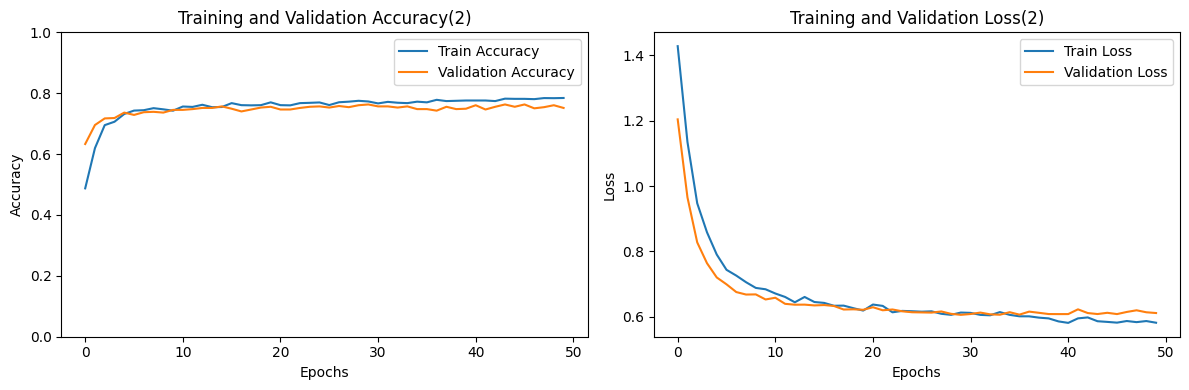

train accuracy2 = 78.433%

validation accuracy2 = 75.159%

train loss2 = 0.582

validation loss2 = 0.611



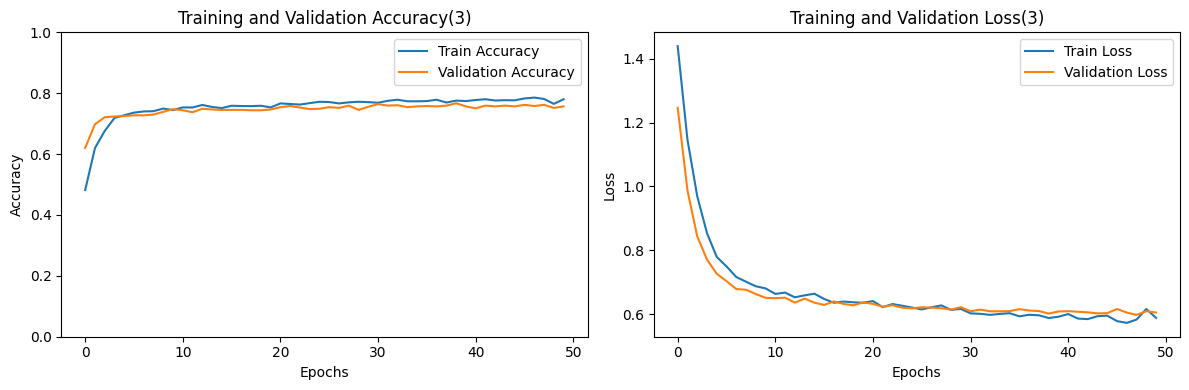

train accuracy3 = 78.018%

validation accuracy3 = 75.669%

train loss3 = 0.588

validation loss3 = 0.605



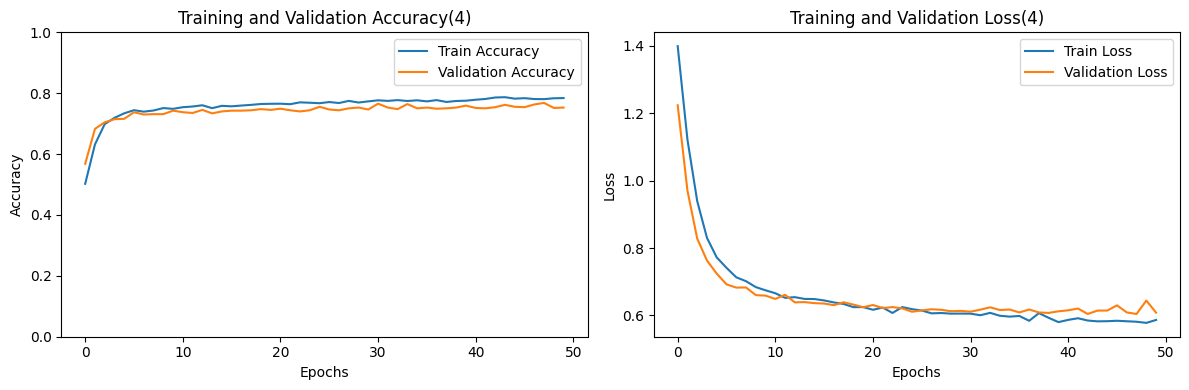

train accuracy4 = 78.401%

validation accuracy4 = 75.287%

train loss4 = 0.587

validation loss4 = 0.608



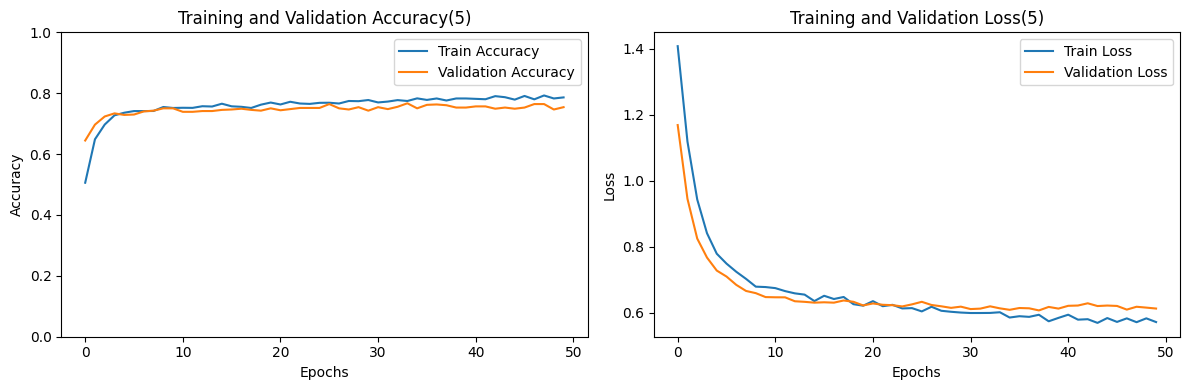

train accuracy5 = 78.624%

validation accuracy5 = 75.414%

train loss5 = 0.571

validation loss5 = 0.612



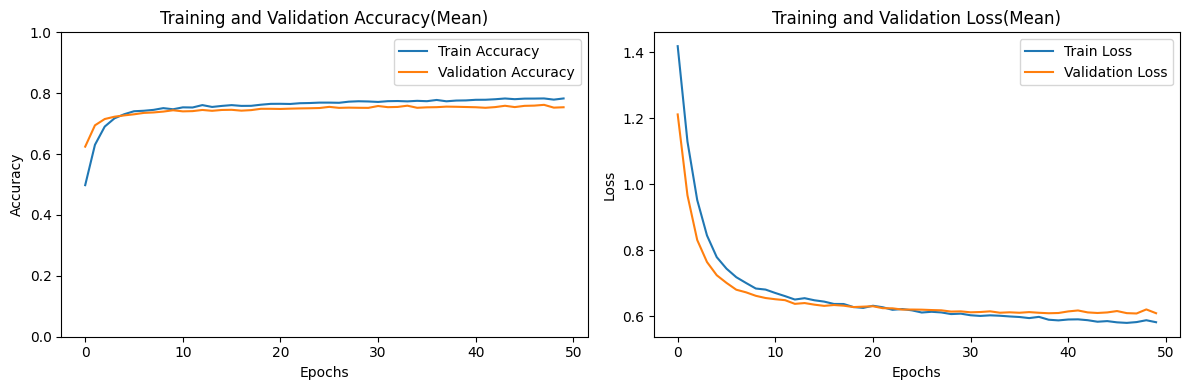

train accuracy Mean = 78.28%

validation accuracy Mean = 75.389%

train loss Mean = 0.582

validation loss Mean = 0.609



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras import regularizers, layers

# Define a function 'x' that loads data, preprocesses it, builds a neural network model, and trains it.
def x():
    # Load data from 'data.csv'
    data = pd.read_csv('data.csv')

    # Separate features and labels
    X = data.drop('Target', axis=1)
    y = data['Target']

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Encode labels using LabelEncoder and OneHotEncoder
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_val_encoded = label_encoder.transform(y_val)

    one_hot_encoder = OneHotEncoder()
    y_train_encoded = one_hot_encoder.fit_transform(y_train_encoded.reshape(-1, 1)).toarray()
    y_val_encoded = one_hot_encoder.transform(y_val_encoded.reshape(-1, 1)).toarray()

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Build a neural network model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(128, activation='sigmoid'))
    model.add(layers.Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model and return the training history
    return model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=64, validation_data=(X_val_scaled, y_val_encoded))

# Lists to store metrics across multiple runs
accuracy = []
val_accuracy = []
loss = []
val_loss = []
h = []

# Run the training function 'x' five times and store the history objects
for _ in range(5):
    a = x()
    h.append(a)

# Aggregate metrics across runs
for i in range(len(h[0].history['accuracy'])):
    accuracy.append((h[0].history['accuracy'][i] + h[1].history['accuracy'][i] + h[2].history['accuracy'][i] +
                     h[3].history['accuracy'][i] + h[4].history['accuracy'][i]) / 5)
    val_accuracy.append((h[0].history['val_accuracy'][i] + h[1].history['val_accuracy'][i] +
                         h[2].history['val_accuracy'][i] + h[3].history['val_accuracy'][i] +
                         h[4].history['val_accuracy'][i]) / 5)
    loss.append((h[0].history['loss'][i] + h[1].history['loss'][i] + h[2].history['loss'][i] +
                 h[3].history['loss'][i] + h[4].history['loss'][i]) / 5)
    val_loss.append((h[0].history['val_loss'][i] + h[1].history['val_loss'][i] + h[2].history['val_loss'][i] +
                     h[3].history['val_loss'][i] + h[4].history['val_loss'][i]) / 5)

# Plot individual runs
for i in range(5):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(h[i].history['accuracy'], label='Train Accuracy')
    plt.plot(h[i].history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.title(f'Training and Validation Accuracy({i + 1})')

    plt.subplot(1, 2, 2)
    plt.plot(h[i].history['loss'], label='Train Loss')
    plt.plot(h[i].history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Training and Validation Loss({i + 1})')

    plt.tight_layout()
    plt.show()
    print(f"train accuracy{i + 1} = {round(h[i].history['accuracy'][-1] * 100, 3)}%\n")
    print(f"validation accuracy{i + 1} = {round(h[i].history['val_accuracy'][-1] * 100, 3)}%\n")
    print(f"train loss{i + 1} = {round(h[i].history['loss'][-1], 3)}\n")
    print(f"validation loss{i + 1} = {round(h[i].history['val_loss'][-1], 3)}\n")

# Plot mean metrics across runs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.title('Training and Validation Accuracy(Mean)')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss(Mean)')

plt.tight_layout()
plt.show()
print(f'train accuracy Mean = {round(accuracy[-1] * 100, 3)}%\n')
print(f'validation accuracy Mean = {round(val_accuracy[-1] * 100, 3)}%\n')
print(f'train loss Mean = {round(loss[-1], 3)}\n')
print(f'validation loss Mean = {round(val_loss[-1], 3)}\n')
